In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/ElectricCarData_Clean.csv')

In [ ]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [ ]:
df.isna().sum() # checking null values

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [ ]:
df['PowerTrain'].unique() # unique values



array(['AWD', 'RWD', 'FWD'], dtype=object)

In [ ]:
df['PlugType'].unique()

array(['Type 2 CCS', 'Type 2 CHAdeMO', 'Type 2', 'Type 1 CHAdeMO'],
      dtype=object)

In [ ]:
df['BodyStyle'].unique()

array(['Sedan', 'Hatchback', 'Liftback', 'SUV', 'Pickup', 'MPV', 'Cabrio',
       'SPV', 'Station'], dtype=object)

In [ ]:
df['Segment'].unique()

array(['D', 'C', 'B', 'F', 'A', 'E', 'N', 'S'], dtype=object)

In [ ]:
df['RapidCharge'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['FastCharge_KmH'].unique()

array(['940', '250', '620', '560', '190', '220', '420', '650', '540',
       '440', '230', '380', '210', '590', '780', '170', '260', '930',
       '850', '910', '490', '470', '270', '450', '350', '710', '240',
       '390', '570', '610', '340', '730', '920', '-', '550', '900', '520',
       '430', '890', '410', '770', '460', '360', '810', '480', '290',
       '330', '740', '510', '320', '500'], dtype=object)

In [ ]:
df['FastCharge_KmH']=df['FastCharge_KmH'].str.replace('-','0')

In [ ]:
df['FastCharge_KmH']=df['FastCharge_KmH'].astype(float)

In [ ]:
df['FastCharge_KmH'].mean()

434.56310679611653

In [ ]:
df['FastCharge_KmH']=df['FastCharge_KmH'].replace(0, 434.56)

In [ ]:
df['FastCharge_KmH'].unique()

array([940.  , 250.  , 620.  , 560.  , 190.  , 220.  , 420.  , 650.  ,
       540.  , 440.  , 230.  , 380.  , 210.  , 590.  , 780.  , 170.  ,
       260.  , 930.  , 850.  , 910.  , 490.  , 470.  , 270.  , 450.  ,
       350.  , 710.  , 240.  , 390.  , 570.  , 610.  , 340.  , 730.  ,
       920.  , 434.56, 550.  , 900.  , 520.  , 430.  , 890.  , 410.  ,
       770.  , 460.  , 360.  , 810.  , 480.  , 290.  , 330.  , 740.  ,
       510.  , 320.  , 500.  ])

In [ ]:
df=df.drop(['Brand','Model'],axis=1) #since brand name models are related to amerian market and it doesnot influence the choice of car selection
df

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,4.6,233,450,161,940.0,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,10.0,160,270,167,250.0,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,4.7,210,400,181,620.0,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,6.8,180,360,206,560.0,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,9.5,145,170,168,190.0,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...
98,7.5,160,330,191,440.0,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,4.5,210,335,258,540.0,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,5.9,200,325,194,440.0,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,5.1,200,375,232,450.0,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


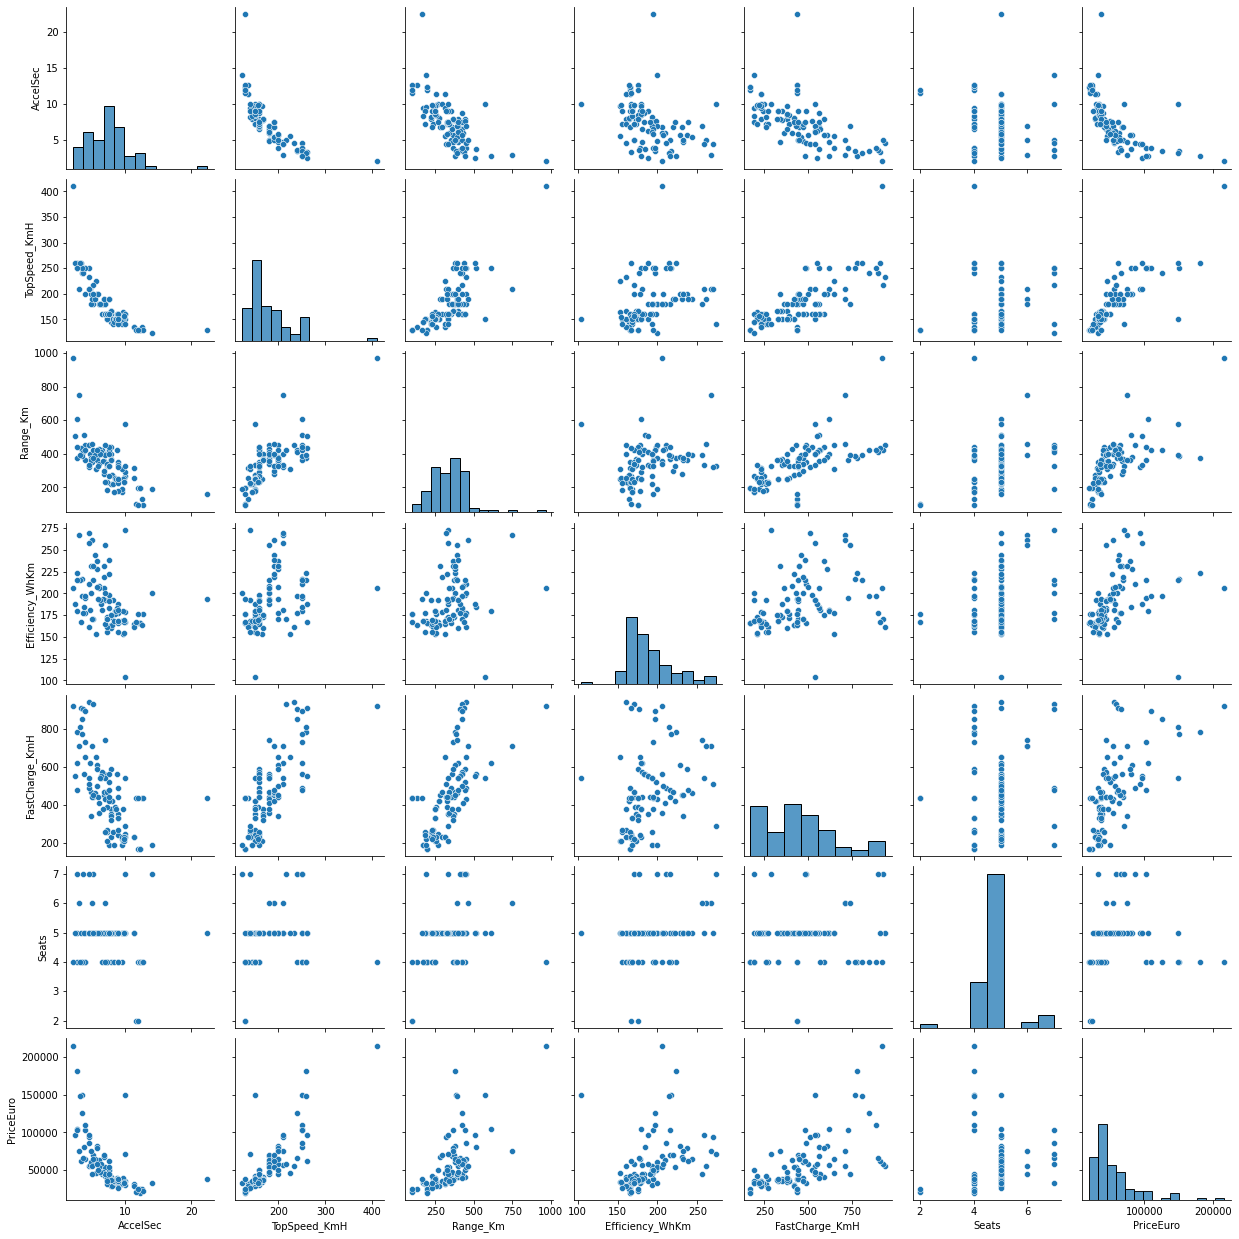

In [ ]:
#EDA
##
sns.pairplot(df) 
plt.show()

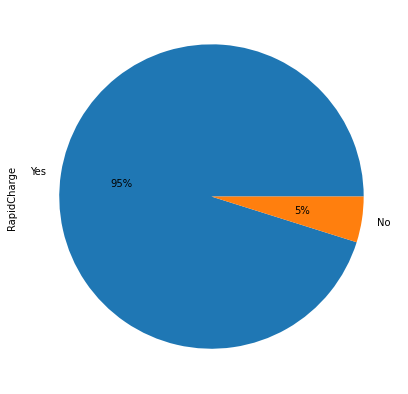

In [ ]:
#Plotting a pie chart
plt.figure(figsize=[9,7])
df['RapidCharge'].value_counts().plot.pie(autopct='%.0f%%')
plt.show()

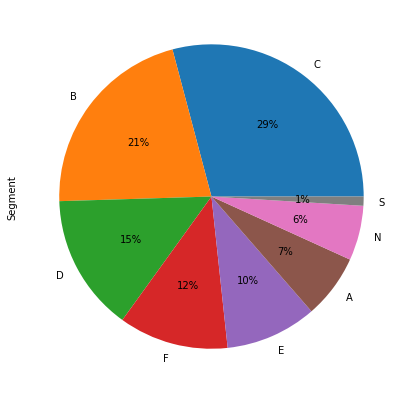

In [ ]:
#Plotting a pie chart
plt.figure(figsize=[9,7])
df['Segment'].value_counts().plot.pie(autopct='%.0f%%')
plt.show()

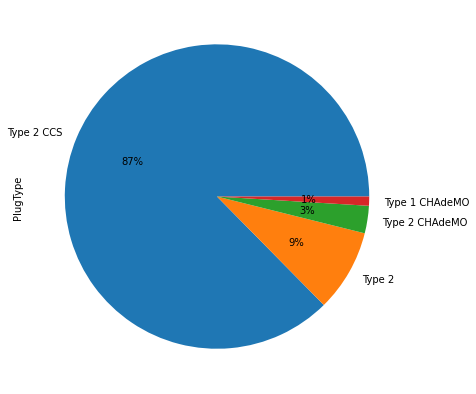

In [ ]:
#Plotting a pie chart
plt.figure(figsize=[9,7])
df['PlugType'].value_counts().plot.pie(autopct='%.0f%%')
plt.show()

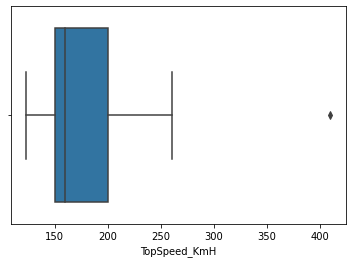

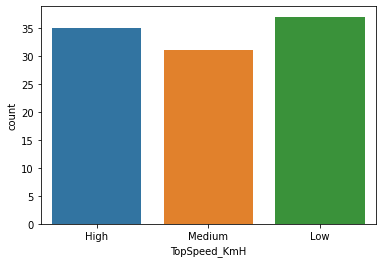

In [ ]:
sns.boxplot(x=df['TopSpeed_KmH'])
plt.show()
def convert(x):
     if x<160:
       return "Low"
     elif x>=160 and x<190:
       return "Medium"
     else:
       return "High"
converted_TopSpeed=df['TopSpeed_KmH'].apply(convert)
sns.countplot(x=converted_TopSpeed)
plt.show()

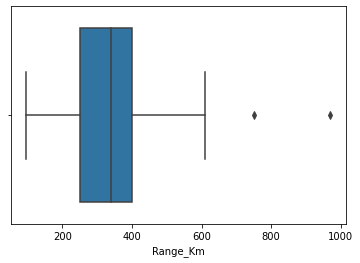

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


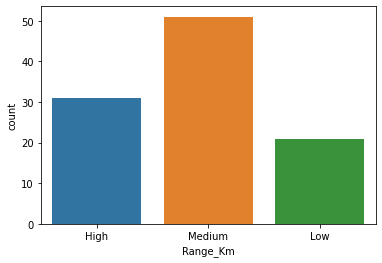

In [ ]:
sns.boxplot(x=df['Range_Km'])
plt.show()
def convert1(x):
     if x<250:
       return "Low"
     elif x>=250 and x<400:
       return "Medium"
     else:
       return "High"
converted_Range=df['Range_Km'].apply(convert1)
sns.countplot(converted_Range)
plt.show()

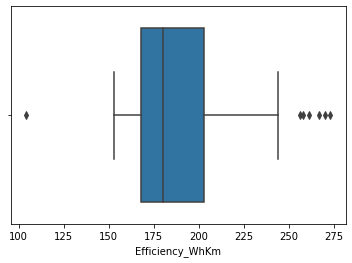

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


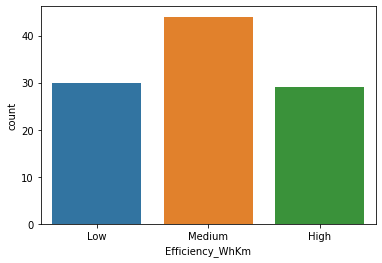

In [ ]:
sns.boxplot(x=df['Efficiency_WhKm'])
plt.show()
def convert2(x):
     if x<170:
       return "Low"
     elif x>=170 and x<200:
       return "Medium"
     else:
       return "High"
converted_Eff=df['Efficiency_WhKm'].apply(convert2)
sns.countplot(converted_Eff)
plt.show()

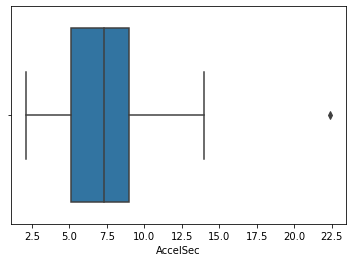

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


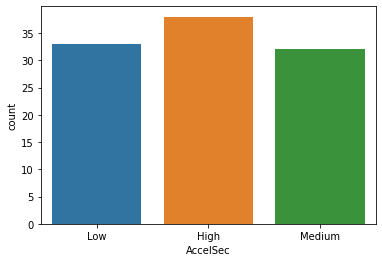

In [ ]:
sns.boxplot(x=df['AccelSec'])
plt.show()
def convert3(x):
     if x<6:
       return "Low"
     elif x>=6 and x<8:
       return "Medium"
     else:
       return "High"
converted_Acc=df['AccelSec'].apply(convert3)
sns.countplot(converted_Acc)
plt.show()

In [ ]:
df['PlugType'].value_counts()

Type 2 CCS        90
Type 2             9
Type 2 CHAdeMO     3
Type 1 CHAdeMO     1
Name: PlugType, dtype: int64

In [ ]:
df['RapidCharge'].value_counts()

Yes    98
No      5
Name: RapidCharge, dtype: int64

In [ ]:
x_num = df.dtypes[df.dtypes != 'object'].index.to_list()
x_num

['AccelSec',
 'TopSpeed_KmH',
 'Range_Km',
 'Efficiency_WhKm',
 'FastCharge_KmH',
 'Seats',
 'PriceEuro']

In [ ]:
# Filtering out the Numerical variables in the df 

x_num_df1 = df.dtypes[df.dtypes != 'object'].index.to_list()
x_num_df1

['AccelSec',
 'TopSpeed_KmH',
 'Range_Km',
 'Efficiency_WhKm',
 'FastCharge_KmH',
 'Seats',
 'PriceEuro']

In [ ]:
df = df[x_num_df1]
df.head()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
0,4.6,233,450,161,940.0,5,55480
1,10.0,160,270,167,250.0,5,30000
2,4.7,210,400,181,620.0,5,56440
3,6.8,180,360,206,560.0,5,68040
4,9.5,145,170,168,190.0,4,32997


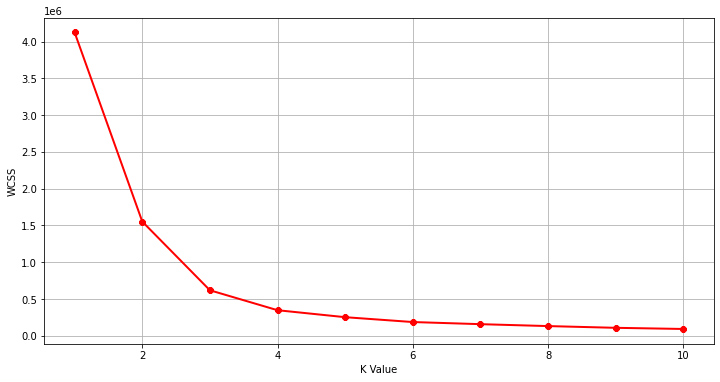

In [ ]:
x1=df.loc[:,['FastCharge_KmH','TopSpeed_KmH']].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(x1)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show() 

In [ ]:
kmeans=KMeans(n_clusters=4)
label1=kmeans.fit_predict(x1)
print(label1)

[1 2 3 3 2 3 2 0 3 3 0 2 0 3 2 3 1 2 2 2 0 1 2 1 1 3 3 0 2 0 0 0 2 1 2 0 2
 3 2 0 3 2 3 2 2 0 2 1 3 0 3 1 0 3 3 2 0 0 0 3 2 1 3 0 0 1 2 1 0 0 2 3 1 0
 2 2 3 0 0 1 0 3 0 0 2 0 1 0 3 0 3 0 0 3 0 0 2 0 0 3 0 0 0]


In [ ]:
print(kmeans.cluster_centers_)

[[410.33684211 165.78947368]
 [827.85714286 246.57142857]
 [223.84615385 146.11538462]
 [557.2        196.24      ]]


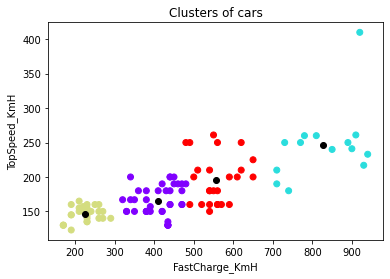

In [ ]:
plt.scatter(x1[:,0],x1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters of cars')
plt.xlabel('FastCharge_KmH')
plt.ylabel('TopSpeed_KmH')
plt.show()

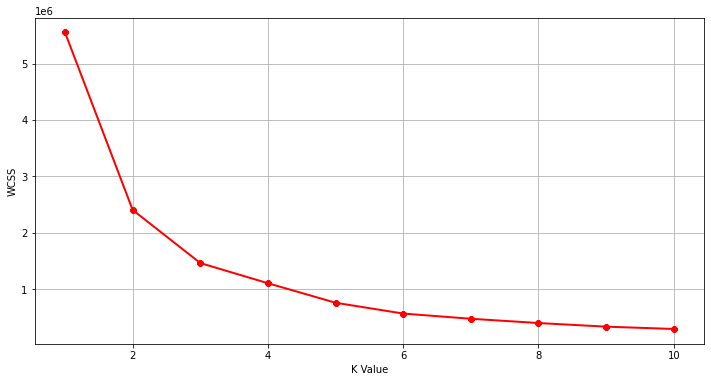

In [ ]:
x2=df.loc[:,['FastCharge_KmH','Range_Km']].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(x2)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show() 

In [ ]:
kmeans=KMeans(n_clusters=5)
label2=kmeans.fit_predict(x2)
print(label2)

[1 3 0 0 3 0 3 2 0 0 2 3 2 0 3 0 1 3 3 3 2 1 3 1 1 0 0 0 3 2 2 2 3 4 3 2 3
 0 3 2 0 3 0 3 3 2 3 1 0 2 0 4 2 0 0 3 2 2 2 0 3 1 0 2 0 1 3 1 2 0 3 0 1 0
 3 3 0 2 2 1 2 0 2 2 3 2 1 2 0 2 0 2 2 0 2 2 3 2 2 0 2 2 0]


In [ ]:
print(kmeans.cluster_centers_)

[[539.33333333 419.5       ]
 [830.         411.25      ]
 [404.32727273 288.18181818]
 [223.84615385 236.34615385]
 [815.         860.        ]]


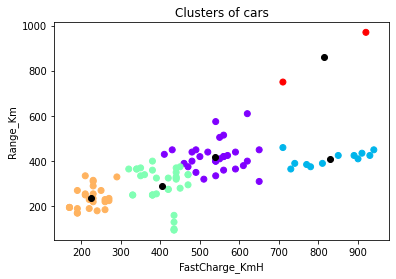

In [ ]:
plt.scatter(x2[:,0],x2[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters of cars')
plt.xlabel('FastCharge_KmH')
plt.ylabel('Range_Km')
plt.show()

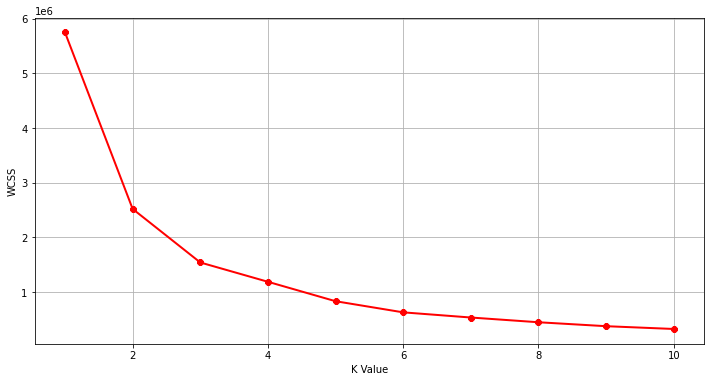

In [ ]:
x3=df.loc[:,['FastCharge_KmH','TopSpeed_KmH','Range_Km']].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(x3)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show() 

In [ ]:
kmeans=KMeans(n_clusters=5)
label3=kmeans.fit_predict(x3)
print(label3)

[2 0 1 1 0 1 0 3 1 1 3 0 3 1 0 1 2 0 0 0 3 2 0 2 2 1 1 1 0 3 3 3 0 4 0 3 0
 1 0 3 1 0 1 0 0 3 0 2 1 3 1 4 3 1 1 0 3 3 3 1 0 2 1 3 1 2 0 2 3 1 0 1 2 1
 0 0 1 3 3 2 3 1 3 3 0 3 2 3 1 3 1 3 3 1 3 3 0 3 3 1 3 1 1]


In [ ]:
print(kmeans.cluster_centers_)

[[223.84615385 146.11538462 236.34615385]
 [536.4516129  194.38709677 418.06451613]
 [830.         236.         411.25      ]
 [402.9        161.875      285.46875   ]
 [815.         310.         860.        ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


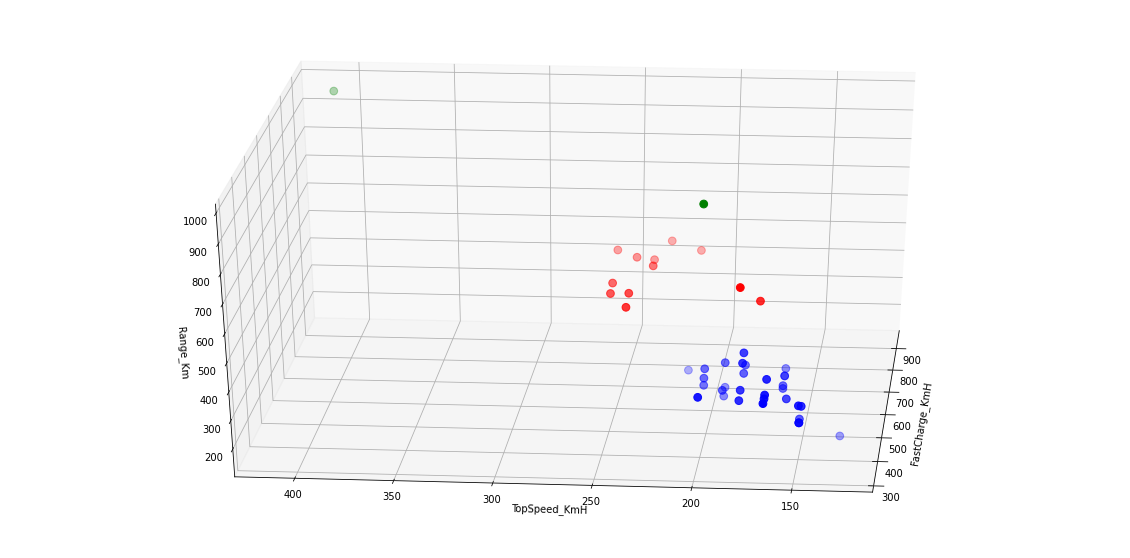

In [ ]:
clusters=kmeans.fit_predict(x3)
df["label"]=clusters
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.FastCharge_KmH[df.label==0],df['TopSpeed_KmH'][df.label==0],df['Range_Km'][df.label==0],c='blue',s=60)
ax.scatter(df.FastCharge_KmH[df.label==1],df['TopSpeed_KmH'][df.label==1],df['Range_Km'][df.label==1],c='red',s=60)
ax.scatter(df.FastCharge_KmH[df.label==2],df['TopSpeed_KmH'][df.label==2],df['Range_Km'][df.label==2],c='green',s=60)
ax.view_init(30,185)
plt.xlabel('FastCharge_KmH')
plt.ylabel('TopSpeed_KmH')
ax.set_zlabel('Range_Km')
plt.show()


In [ ]:
df['cluster1']=label1
df['cluster2']=label2
df['cluster3']=label3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
# Step 1a: Get the total size of the cluster:
df.cluster1.size

# Step 1b: Get the break up of the values in each segment:
# which gives how many observations are there in each of the respective segment:

df.cluster1.value_counts()


0    38
2    26
3    25
1    14
Name: cluster1, dtype: int64

In [ ]:
# by using the Sort Index provides:
# the value counts based on the Segment Label (0,1,2 depending upon the K-value) in the index
# and not based on the highest value within the segments

pd.Series.sort_index(df.cluster1.value_counts())

0    38
1    14
2    26
3    25
Name: cluster1, dtype: int64

In [ ]:
# combining the size for each cluster K value into one single array:

size=pd.concat([pd.Series(df.cluster1.size), pd.Series.sort_index(df.cluster1.value_counts()), pd.Series.sort_index(df.cluster2.value_counts()), pd.Series.sort_index(df.cluster3.value_counts())])

In [ ]:
# Gives the size of Segments for each of the Clusters :

size

0    103
0     38
1     14
2     26
3     25
0     30
1     12
2     33
3     26
4      2
0     26
1     31
2     12
3     32
4      2
dtype: int64

In [ ]:
# Segment Size:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])

# Segment Distribtuion % wise:
Seg_Pct = pd.DataFrame(size/df.cluster1.size, columns=['Seg_Pct'])

In [ ]:
# Taking Transpose of Segment Percentage :
Seg_Pct.T

,0,0,1,2,3,0,1,2,3,4,0,1,2,3,4
Seg_Pct,1.0,0.368932,0.135922,0.252427,0.242718,0.291262,0.116505,0.320388,0.252427,0.019417,0.252427,0.300971,0.116505,0.31068,0.019417


In [ ]:
# Concatenating the Segment Size and Segment Percentage:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,3,0,1,2,3,4,0,1,2,3,4
Seg_size,103.0,38.000000,14.000000,26.000000,25.000000,30.000000,12.000000,33.000000,26.000000,2.000000,26.000000,31.000000,12.000000,32.00000,2.000000
Seg_Pct,1.0,0.368932,0.135922,0.252427,0.242718,0.291262,0.116505,0.320388,0.252427,0.019417,0.252427,0.300971,0.116505,0.31068,0.019417


In [ ]:
# Overall each variables wise Avg:
df.apply(np.mean).T

AccelSec               7.396117
TopSpeed_KmH         179.194175
Range_Km             338.786408
Efficiency_WhKm      189.165049
FastCharge_KmH       455.658252
Seats                  4.883495
PriceEuro          55811.563107
label                  2.019417
cluster1               1.368932
cluster2               1.592233
cluster3               1.543689
dtype: float64

In [ ]:
# Grouping-by over each cluster to find the Segment wise average for each variable
df.groupby('cluster1').apply(np.mean).T

cluster1,0,1,2,3
AccelSec,8.163158,3.921429,9.611538,5.872
TopSpeed_KmH,165.789474,246.571429,146.115385,196.240
Range_Km,304.078947,475.357143,236.346154,421.600
Efficiency_WhKm,190.052632,207.857143,173.000000,194.160
FastCharge_KmH,410.336842,827.857143,223.846154,557.200
Seats,4.736842,5.000000,4.846154,5.080
PriceEuro,44528.131579,103394.928571,34069.346154,68927.600
label,0.578947,1.142857,3.000000,3.680
cluster1,0.000000,1.000000,2.000000,3.000
cluster2,1.736842,1.428571,3.000000,0.000


In [ ]:
# Concatinating the above two averages:

Profiling_output = pd.concat([df.apply(lambda x: x.mean()).T, 
                df.groupby('cluster1').apply(lambda x: x.mean()).T, 
                df.groupby('cluster2').apply(lambda x: x.mean()).T,
                df.groupby('cluster3').apply(lambda x: x.mean()).T], axis=1)

In [ ]:
Profiling_output


,0,0,1,2,3,0,1,2,3,4,0,1,2,3,4
AccelSec,7.396117,8.163158,3.921429,9.611538,5.872,5.923333,4.150000,8.463636,9.611538,2.55,9.611538,5.896774,4.150000,8.56875,2.55
TopSpeed_KmH,179.194175,165.789474,246.571429,146.115385,196.240,194.200000,236.000000,163.030303,146.115385,310.00,146.115385,194.387097,236.000000,161.87500,310.00
Range_Km,338.786408,304.078947,475.357143,236.346154,421.600,419.500000,411.250000,288.181818,236.346154,860.00,236.346154,418.064516,411.250000,285.46875,860.00
Efficiency_WhKm,189.165049,190.052632,207.857143,173.000000,194.160,198.166667,203.083333,185.787879,173.000000,236.50,173.000000,199.258065,203.083333,184.34375,236.50
FastCharge_KmH,455.658252,410.336842,827.857143,223.846154,557.200,539.333333,830.000000,404.327273,223.846154,815.00,223.846154,536.451613,830.000000,402.90000,815.00
Seats,4.883495,4.736842,5.000000,4.846154,5.080,5.066667,5.000000,4.696970,4.846154,5.00,4.846154,5.064516,5.000000,4.68750,5.00
PriceEuro,55811.563107,44528.131579,103394.928571,34069.346154,68927.600,67566.733333,96460.750000,42068.393939,34069.346154,145000.00,34069.346154,67483.935484,96460.750000,41351.78125,145000.00
label,2.019417,0.578947,1.142857,3.000000,3.680,3.200000,1.000000,0.545455,3.000000,2.00,3.000000,3.096774,1.000000,0.56250,2.00
cluster1,1.368932,0.000000,1.000000,2.000000,3.000,2.500000,1.000000,0.000000,2.000000,1.00,2.000000,2.419355,1.000000,0.00000,1.00
cluster2,1.592233,1.736842,1.428571,3.000000,0.000,0.000000,1.000000,2.000000,3.000000,4.00,3.000000,0.064516,1.000000,2.00000,4.00
